In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\python project\ML projects\RFE and DT\student_performance_dataset.csv")
df

,Attendance,Study_Hours,Assignments_Completed,Sleep_Hours,Internet_Usage_Hours,Extra_Classes,Final_Score
0,88,4,5,5,5,1,72.5
1,78,5,5,8,4,1,78.2
2,64,3,7,7,3,1,56.9
3,92,1,10,5,2,1,57.3
4,57,4,11,7,2,1,72.2
...,...,...,...,...,...,...,...
145,58,4,8,8,2,0,69.3
146,64,1,5,7,3,0,49.9
147,64,5,9,7,3,1,84.8
148,75,4,11,7,4,0,73.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Attendance             150 non-null    int64  
 1   Study_Hours            150 non-null    int64  
 2   Assignments_Completed  150 non-null    int64  
 3   Sleep_Hours            150 non-null    int64  
 4   Internet_Usage_Hours   150 non-null    int64  
 5   Extra_Classes          150 non-null    int64  
 6   Final_Score            150 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 8.3 KB


In [6]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Attendance,Study_Hours,Assignments_Completed,Sleep_Hours,Internet_Usage_Hours,Extra_Classes,Final_Score
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,73.700000,2.866667,9.480000,6.053333,3.066667,0.486667,66.617333
std,14.356791,1.398305,2.953146,1.455315,1.504653,0.501497,14.711538
min,50.000000,1.000000,5.000000,4.000000,1.000000,0.000000,33.800000
25%,61.500000,1.000000,7.000000,5.000000,2.000000,0.000000,55.250000
50%,73.000000,3.000000,9.500000,6.000000,3.000000,0.000000,68.200000
75%,86.000000,4.000000,12.000000,7.000000,4.750000,1.000000,77.050000
max,99.000000,5.000000,14.000000,8.000000,5.000000,1.000000,104.900000


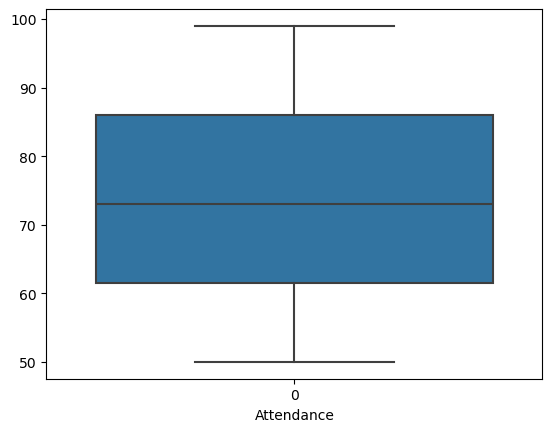

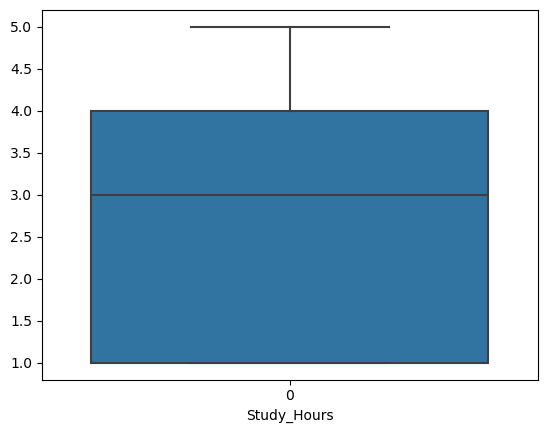

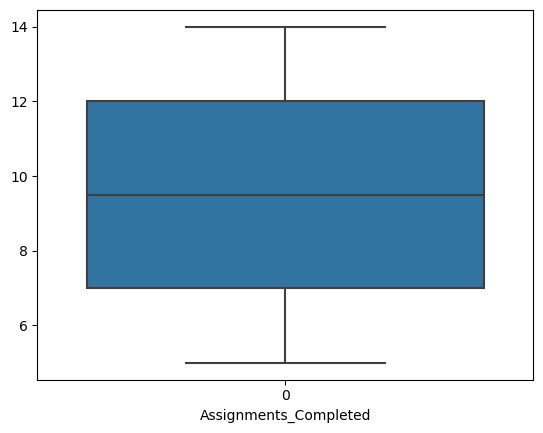

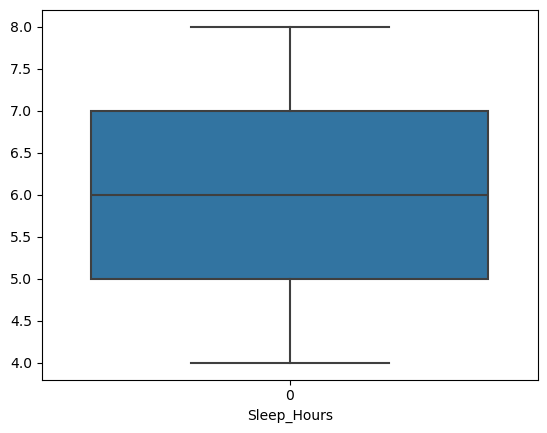

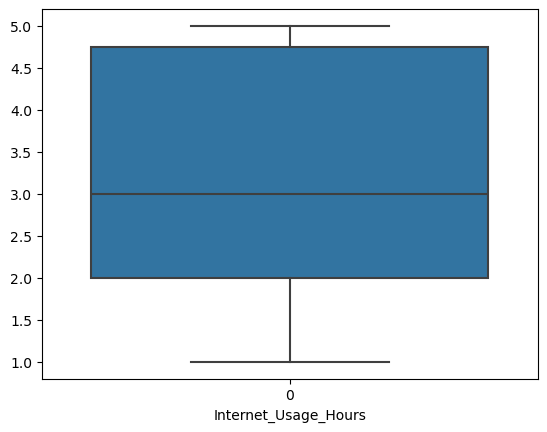

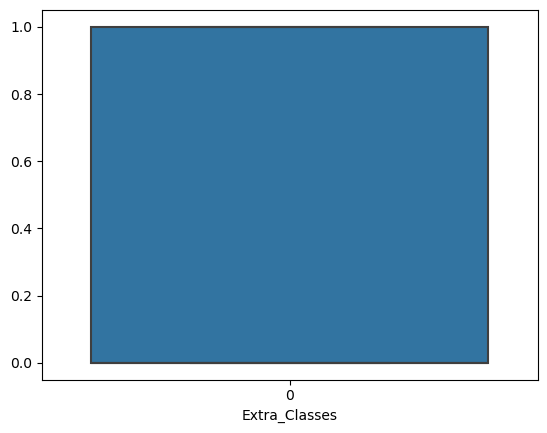

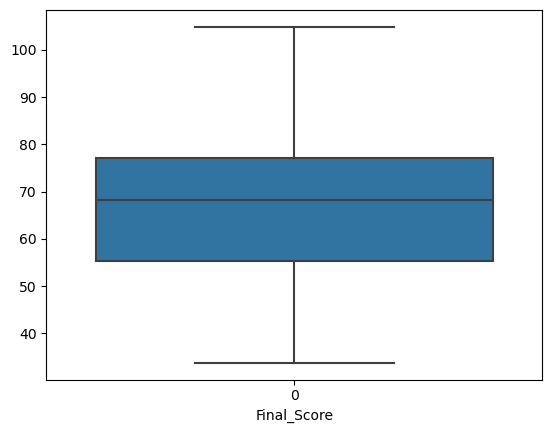

In [7]:
for col in df.columns:
    if df[col].dtype != "object":
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [38]:
x = df.drop("Final_Score", axis = 1)
y = df["Final_Score"]

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_values = []
vif_data["features"] = x.columns
for i in range(len(x.columns)):
    vif = variance_inflation_factor(x.values, i)
    vif_values.append(vif)

vif_data["vif_values"]= vif_values
vif_data

,features,vif_values
0,Attendance,14.945708
1,Study_Hours,5.170122
2,Assignments_Completed,9.523994
3,Sleep_Hours,13.523402
4,Internet_Usage_Hours,5.488155
5,Extra_Classes,2.014465


In [37]:
x_new = x.copy()
x_new

,Attendance,Study_Hours,Assignments_Completed,Sleep_Hours,Internet_Usage_Hours,Extra_Classes
0,88,4,5,5,5,1
1,78,5,5,8,4,1
2,64,3,7,7,3,1
3,92,1,10,5,2,1
4,57,4,11,7,2,1
...,...,...,...,...,...,...
145,58,4,8,8,2,0
146,64,1,5,7,3,0
147,64,5,9,7,3,1
148,75,4,11,7,4,0


In [36]:
while True:
    vif_data = pd.DataFrame()
    vif_data["features"] = x_new.columns
    
    vif_values = []
    for i in range(len(x_new.columns)):
        vif = variance_inflation_factor(x_new.values, i)
        vif_values.append(vif)

    vif_data["vif_values"] = vif_values
    

    print(vif_data)

    max_vif = vif_data["vif_values"].max()
    max_feature = vif_data.loc[vif_data["vif_values"].idxmax(), "features"]
    print("Current maximum VIF:", max_vif, "for feature:", max_feature)

    if max_vif > 5:
        print("feature dropping: ", max_feature)
        x_new = x_new.drop(columns = [max_feature])

    else:
        print("all features have vif <= 5")
        break


               features  vif_values
0           Study_Hours    3.259280
1  Internet_Usage_Hours    3.586033
2         Extra_Classes    1.882595
Current maximum VIF: 3.5860328573990854 for feature: Internet_Usage_Hours
all features have vif <= 5


In [22]:
vif_data

,features,vif_values
0,Study_Hours,3.259280
1,Internet_Usage_Hours,3.586033
2,Extra_Classes,1.882595


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y,test_size = 0.30, random_state = 42)

In [48]:
from sklearn.feature_selection import RFE 
from sklearn.tree import DecisionTreeRegressor

In [55]:
model = DecisionTreeRegressor(max_depth = 4, random_state = 42 )
rfe = RFE(estimator = model , n_features_to_select=3)
rfe.fit(x_train,y_train)
selected_feature = list(x_new.columns[rfe.support_])
print("\nSelected Features by RFE:", selected_feature)
print("Feature Ranking:", rfe.ranking_)



Selected Features by RFE: ['Attendance', 'Study_Hours', 'Assignments_Completed']
Feature Ranking: [1 1 1 4 2 3]


In [57]:
x_train_rfe = x_train[selected_feature]
x_test_rfe = x_test[selected_feature]

In [58]:
model = DecisionTreeRegressor(max_depth = 4, random_state = 42)
model.fit(x_train_rfe,y_train)
y_predict = model.predict(x_test_rfe)

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE: ", mean_squared_error(y_test, y_predict))
print("r2: ", r2_score(y_test, y_predict)*100)


MSE:  97.85626374528194
r2:  63.56337976326956


In [62]:
expected_cols = model.feature_names_in_
print(expected_cols)


['Attendance' 'Study_Hours' 'Assignments_Completed']


In [65]:
student_df = pd.DataFrame({
    "Attendance": [80],
    "Study_Hours": [4],
    "Assignments_Completed": [10],
    "Sleep_Hours": [6],
    "Internet_Usage_Hours": [3],
    "Extra_Classes": [1]
})

student_df = student_df.reindex(columns=expected_cols, fill_value=0)
predicted_score = model.predict(student_df)
print("Predicted Final Score =", predicted_score)

Predicted Final Score = [80.1]


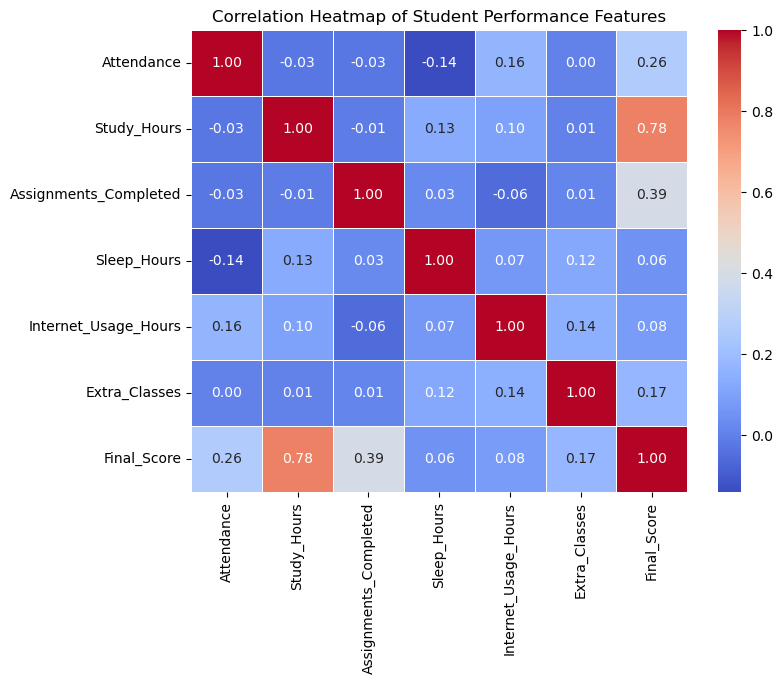

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Student Performance Features")
plt.show()
